# K-Means clustering model for credit card dataset 

In [1]:
# Importing all important libraries which will be in use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading dataset with pandas
data = pd.read_csv('CC GENERAL.csv')

In [3]:
# Getting top 5 rows of our dataset
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Checking null values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Checking data typesof the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Dropping a column because it does not impact on our data in any way
data.drop('CUST_ID', axis=1, inplace=True)

In [7]:
# rows and columns in our dataset
data.shape

(8950, 17)

In [8]:
# After removing 'CUST_ID' column, top rows are:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
data['MINIMUM_PAYMENTS'].value_counts()

864.206542     313
299.351881       2
179.412493       1
188.409994       1
1226.820327      1
              ... 
202.184147       1
185.120378       1
58.816069        1
149.575815       1
174.819050       1
Name: MINIMUM_PAYMENTS, Length: 8637, dtype: int64

<AxesSubplot:ylabel='MINIMUM_PAYMENTS'>

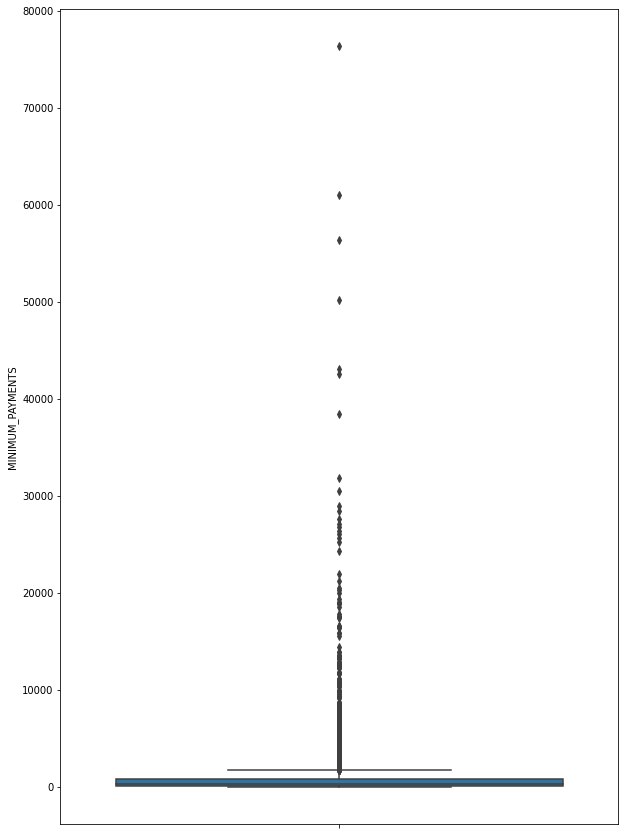

In [10]:
# Boxplot of 'Minimum payments' column, which helps in checking our outliers.
plt.figure(figsize=(10,15))
sns.boxplot(y = data['MINIMUM_PAYMENTS'])

In the above boxplot, there are many values which we should considered as outliers.

In [10]:
# Getting median value of 'MINIMUM PAYMENTS' column
data['MINIMUM_PAYMENTS'].median()

312.343947

In [11]:
# Filling all the null values with the median value. because of the outlier problem.
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

In [12]:
#Again checking the null values
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

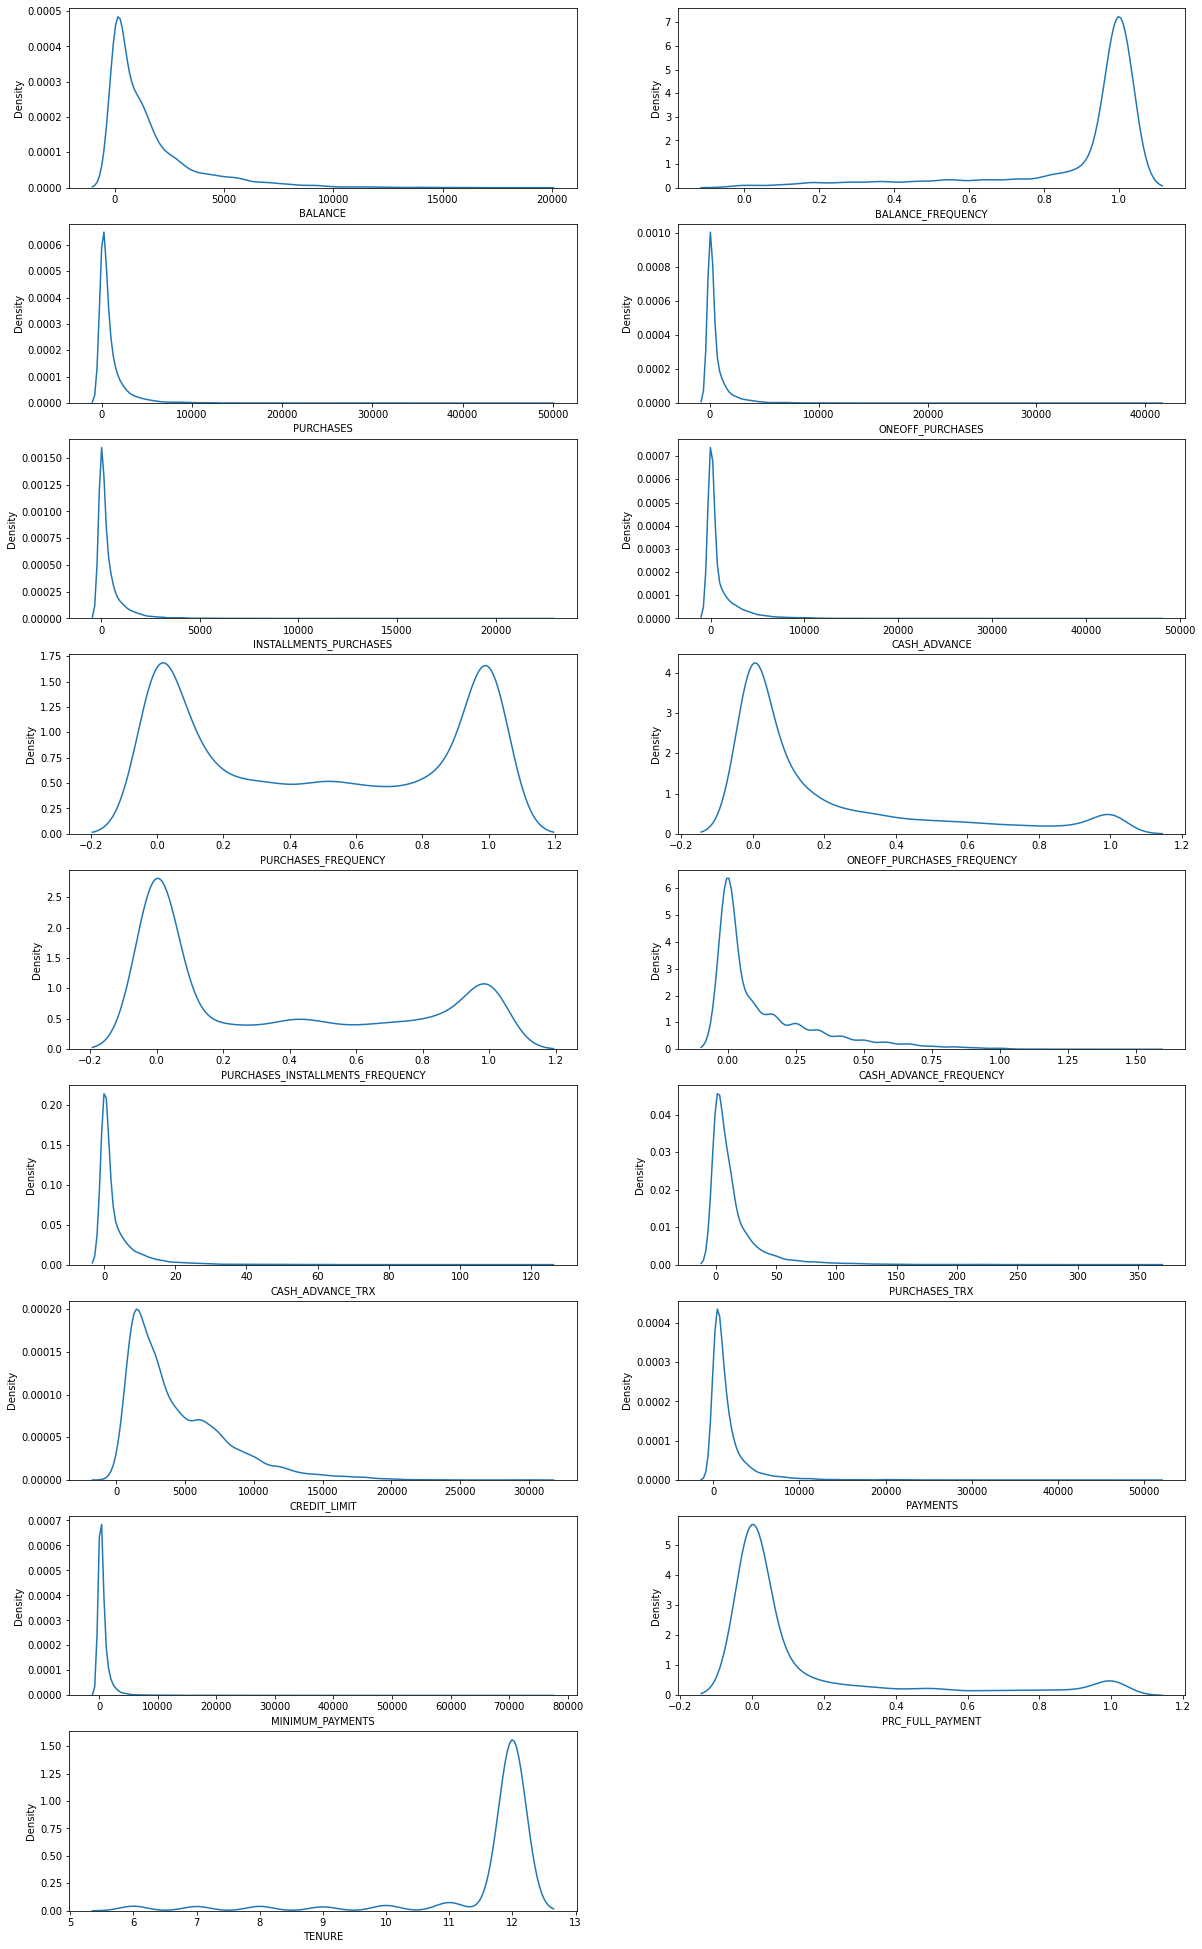

In [23]:
# Probability distribution function of all the columns, to check how the distribution occur. 
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)

<AxesSubplot:>

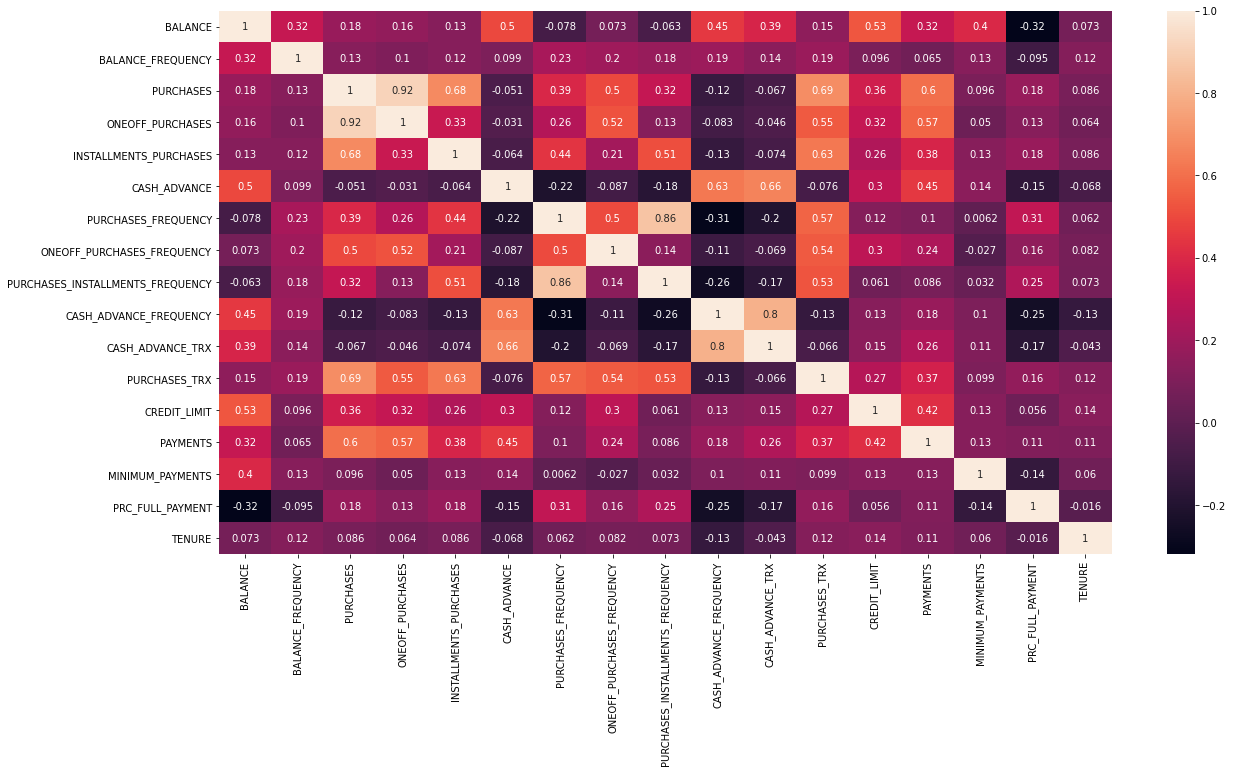

In [31]:
# Correlations between the columns
correlations = data.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True)

Above is a correlation matrix, which helps us in the analysis of the data.

In [13]:
X = data.iloc[:, :].values

In [14]:
# As we have see the data is skewed,so we use Standard scalar for feature scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = sc.transform(X)


In [15]:
X

array([[ -0.75199149,  -4.75622253,  -0.46975076, ...,  -0.37096467,
         -2.32241175,  -8.33670007],
       [ -0.75126173,  -3.13623896,  -0.46977166, ...,  -0.37079291,
          0.27527168,  -8.33670007],
       [ -0.75142499,  -1.51625539,  -0.46960228, ...,  -0.37087486,
         -2.32241175,  -8.33670007],
       ...,
       [ -0.75199553,  -4.48623418,  -0.46974002, ...,  -0.37097518,
          0.59998504, -11.68691641],
       [ -0.75199783,  -4.48623418,  -0.46977166, ...,  -0.37098009,
          0.59998504, -11.68691641],
       [ -0.7519149 ,  -7.45619516,  -0.46953216, ...,  -0.3709741 ,
         -2.32241175, -11.68691641]])

## Using elbow method to choose the number of clusters for our model


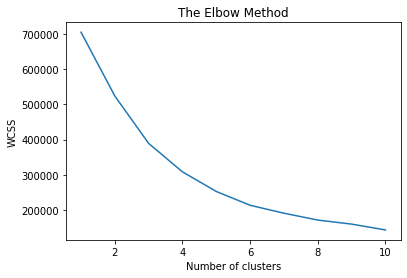

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From above graph, number of clusters should be equal to 7.

## Apply K-Means method

In [17]:
kmeans = KMeans(7)
kmeans.fit(X)
labels = kmeans.labels_

In [18]:
kmeans.cluster_centers_.shape

(7, 17)

In [19]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.751637,-2.134630,-0.469696,-0.357054,-0.454976,-0.466864,-3.275264,-1.974110,-2.767492,-2.244671,-0.515975,-0.610674,-1.235341,-0.598775,-0.370816,-2.075375,-8.540874
1,-0.751720,-2.009107,-0.469542,-0.357056,-0.454109,-0.466946,1.241479,-1.966270,2.099429,-3.218194,-0.530173,-0.581332,-1.235339,-0.598741,-0.370769,-1.371055,-8.550835
2,-0.751514,-1.835546,-0.469149,-0.356390,-0.454163,-0.466926,1.223122,5.611575,-0.088892,-2.739304,-0.523721,-0.549685,-1.235155,-0.598583,-0.370837,-1.376950,-8.462848
3,-0.751111,-1.934920,-0.469594,-0.356961,-0.454720,-0.466021,-1.948750,-0.682389,-1.623208,13.091115,-0.125290,-0.594683,-1.235134,-0.598483,-0.370732,-1.816454,-8.840640
4,-0.751966,-12.992756,-0.469696,-0.357075,-0.454905,-0.466903,-2.601483,-2.233189,-1.963124,-3.029596,-0.526759,-0.608534,-1.235334,-0.598738,-0.370937,-0.248126,-8.682782
5,-0.751953,-3.146607,-0.469302,-0.356698,-0.453974,-0.466998,1.046547,0.883650,0.972464,-3.890579,-0.543278,-0.571651,-1.235224,-0.598635,-0.370953,7.630912,-8.626567
6,-0.751373,-2.217131,-0.469700,-0.357078,-0.454915,-0.466457,-2.995220,-2.011918,-2.377029,4.528247,-0.377734,-0.607371,-1.235267,-0.598665,-0.370785,-1.970318,-8.693962


In [20]:
# To understand the data better, perform the inverse transformation
cluster_centers = np.round(sc.inverse_transform(cluster_centers),4)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[data.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.0054,0.3716,-0.3079,-0.1997,-0.3611,-0.1635,-0.8242,-0.3865,-0.7354,-0.3140,-0.2723,-0.4693,-0.2283,-0.2522,0.0366,-0.4533,0.0874
1,-0.1668,0.4013,0.0217,-0.2025,0.4228,-0.3365,0.9886,-0.3841,1.1988,-0.5088,-0.3692,0.2601,-0.2207,-0.1541,0.1456,-0.2473,0.0741
2,0.2618,0.4424,0.8601,0.9034,0.3736,-0.2945,0.9812,1.8765,0.3291,-0.4130,-0.3252,1.0467,0.4513,0.3038,-0.0142,-0.2490,0.1919
3,1.0998,0.4189,-0.0892,-0.0443,-0.1297,1.6034,-0.2918,-0.0011,-0.2807,2.7548,2.3938,-0.0718,0.5278,0.5946,0.2313,-0.3776,-0.3137
4,-0.6779,-2.2006,-0.3076,-0.2339,-0.2971,-0.2458,-0.5538,-0.4637,-0.4158,-0.4711,-0.3459,-0.4161,-0.2029,-0.1441,-0.2459,0.0811,-0.1025
5,-0.6514,0.1319,0.5349,0.3922,0.5443,-0.4452,0.9104,0.4661,0.7509,-0.6434,-0.4586,0.5007,0.1974,0.1547,-0.2827,2.3856,-0.0272
6,0.5561,0.3521,-0.3156,-0.2392,-0.3066,0.6894,-0.7118,-0.3977,-0.5803,1.0413,0.6711,-0.3871,0.0421,0.0662,0.1089,-0.4226,-0.1174


In [21]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 6, 3, ..., 2, 1, 6])

## Top 5 rows of our dataset with respect to the cluster they belong.

In [22]:
creditcard_df_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
